<h1>Feature Engineering</h1>
<hr>

In [41]:
# import libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [42]:
#import dataset
df=pd.read_csv("cleaned_listings.csv")

<h1>Co-relations in the dataset</h1>

In [43]:
correlations = df.loc[:, ~df.columns.isin(['id'])].corr()

<ipython-input-43-16770c18d44d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.loc[:, ~df.columns.isin(['id'])].corr()


In [44]:
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

<ipython-input-44-f1d5803af9ee>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlations, dtype=np.bool)


<Axes: >

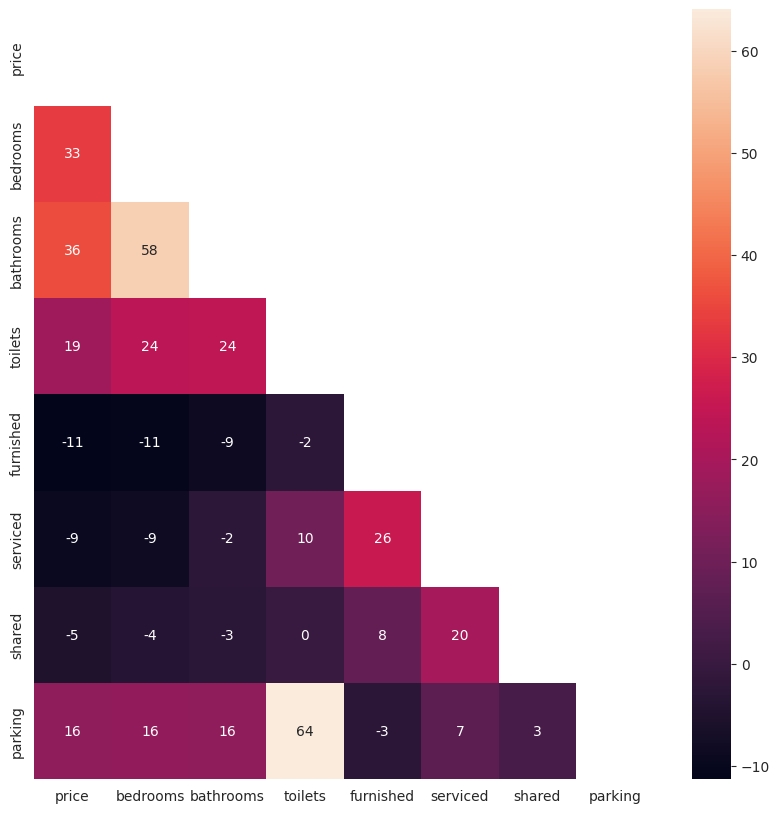

In [45]:
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.heatmap(correlations*100, annot=True, fmt ='.0f', mask=mask)

In [46]:
correlations = df.loc[(df['category']=='For Sale')].loc[:, ~df.columns.isin(['id'])].corr()

<ipython-input-46-5dd29c1038aa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.loc[(df['category']=='For Sale')].loc[:, ~df.columns.isin(['id'])].corr()


<Axes: >

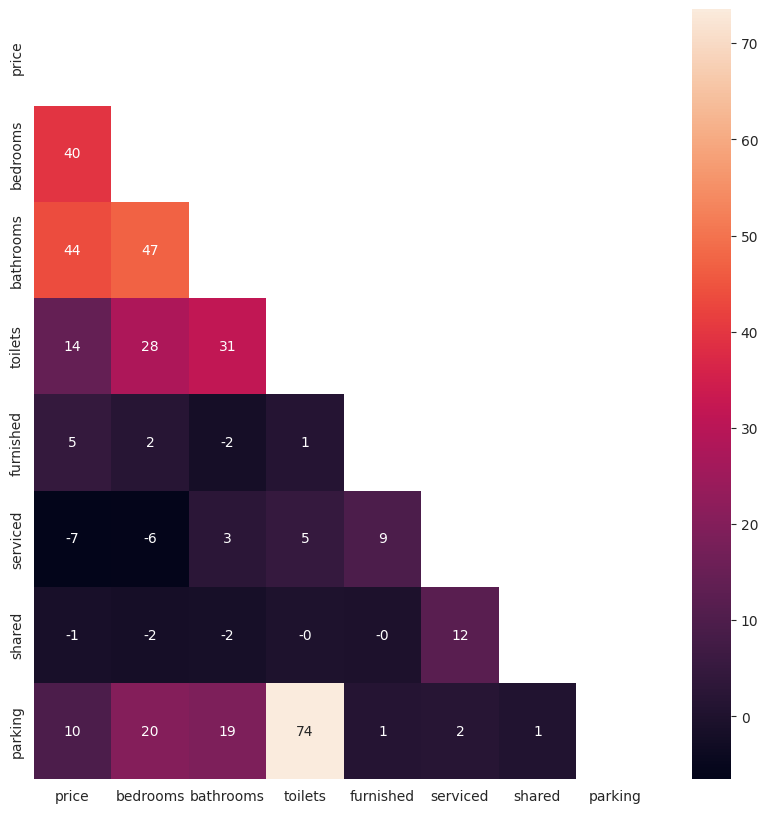

In [47]:
#correlation in properties listed for sale
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.heatmap(correlations*100, annot=True, fmt ='.0f', mask=mask)

In [48]:
correlations = df.loc[(df['category']=='For Rent')].loc[:, ~df.columns.isin(['id'])].corr()

<ipython-input-48-24ebddd5bd44>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.loc[(df['category']=='For Rent')].loc[:, ~df.columns.isin(['id'])].corr()


<Axes: >

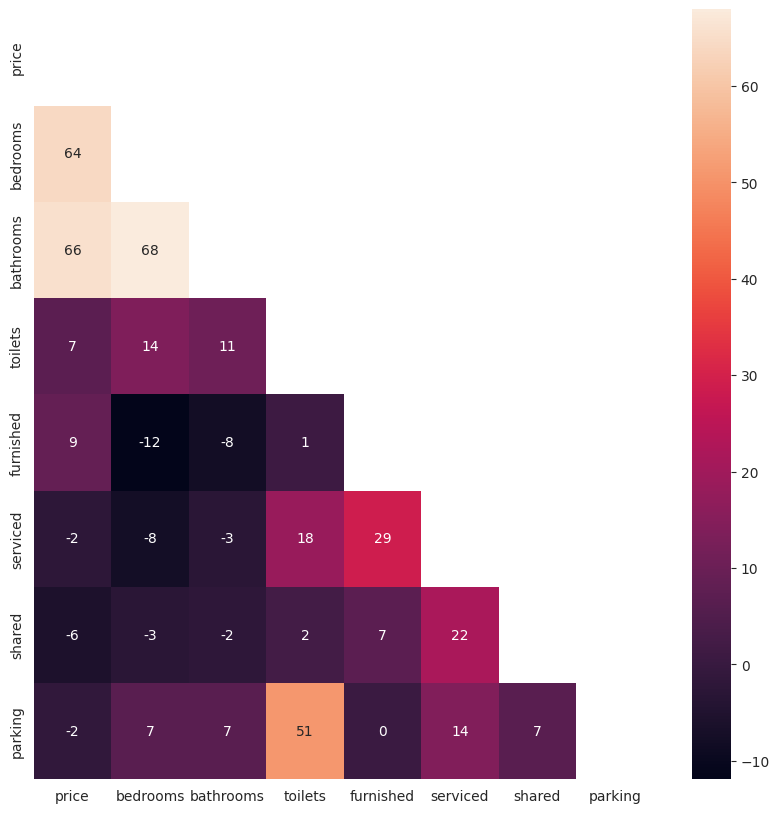

In [49]:
#correlation in properties listed for sale
plt.figure(figsize=(10,10))
sns.set_style('white')
sns.heatmap(correlations*100, annot=True, fmt ='.0f', mask=mask)

In [50]:
df.shape

(6930, 16)

In [51]:
#convert data type listdate to date
df['listdate']= pd.to_datetime(df['listdate'])

In [52]:
df["list_year"]=df['listdate'].dt.year
df["list_month"]=df['listdate'].dt.month

In [53]:
df.drop('listdate', inplace=True, axis=1)
df.drop('id', inplace=True, axis=1)

In [54]:
df.shape

(6930, 16)

In [55]:
df.dtypes

price              float64
price_qualifier     object
bedrooms             int64
bathrooms            int64
toilets            float64
furnished            int64
serviced             int64
shared               int64
parking              int64
category            object
type                object
sub_type            object
state               object
locality            object
list_year            int64
list_month           int64
dtype: object

In [56]:
df.head()


,price,price_qualifier,bedrooms,bathrooms,toilets,furnished,serviced,shared,parking,category,type,sub_type,state,locality,list_year,list_month
0,200000.0,per month,5,5,5.0,0,0,0,0,For Rent,House,Townhouse,Nairobi,Nairobi Central,2021,7
1,100000.0,per month,3,3,3.0,0,0,0,0,For Rent,Apartment,Missing,Nairobi,Parklands,2021,7
2,120000.0,per month,3,3,3.0,0,0,0,0,For Rent,Apartment,Missing,Nairobi,Lavington,2021,7
3,180000.0,per month,2,2,2.0,1,0,0,0,For Rent,Apartment,Missing,Nairobi,Westlands,2021,7
4,270000.0,Missing,4,4,4.0,0,0,0,0,For Rent,House,Townhouse,Nairobi,Lavington,2021,7


In [58]:
# Save analytical table
df.to_csv('analytical_table.csv', index = False)